<a href="https://colab.research.google.com/github/Adn02/Intro-to-ML/blob/main/Homework/HW5/HW5Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import torch.optim as optim
import pandas as pd
import numpy as np
import torch

url = "https://raw.githubusercontent.com/Adn02/Intro-to-ML/main/Datasets/Housing.csv"
hf = pd.read_csv(url)

variable_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

def binary_mapping(x):
  return x.map({'no' : 0, 'yes' : 1})

hf[variable_list] = hf[variable_list].apply(binary_mapping)
hf = hf.drop('furnishingstatus', axis=1)

# **Pre-processing and Training**


> **Separating desired Features and Outputs**


In [43]:
y = hf.pop('price')
features = hf.columns.tolist()
x = hf.values

t_un = torch.tensor(StandardScaler().fit_transform(x), dtype=torch.float32)
t_u = torch.tensor(x, dtype=torch.float32)
t_c = torch.tensor(y, dtype=torch.float32)


> **Splitting Training and Validation Set**


In [44]:
samples = t_un.shape[0]
values = int(0.2 * samples)

shuffle = torch.randperm(samples)
train_idx = shuffle[:-values]
valid_idx = shuffle[-values:]

t_un_train = t_un[train_idx]
t_un_valid = t_un[valid_idx]

t_u_train = t_u[train_idx]
t_u_valid = t_u[valid_idx]

t_c_train = t_c[train_idx]
t_c_valid = t_c[valid_idx]



> **Linear Regression Training**




In [45]:
def lin_model(t_u, w11, w10, w9, w8, w7, w6, w5, w4, w3, w2, w1, b):
  return torch.matmul(t_u, params[:-1]) + params[-1]

def cost(t_p, t_c):
  squared_diffs = (t_p - t_c)**2
  return squared_diffs.mean()

def lin_training(epochs, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid):
  train_losses = []
  valid_losses = []

  for epoch in range(1, epochs+1):
    t_p_train = lin_model(t_u_train, *params)
    train_loss = cost(t_p_train, t_c_train)

    t_p_valid = lin_model(t_u_valid, *params)
    valid_loss = cost(t_p_valid, t_c_valid)

    optimizer.zero_grad()
    train_loss.backward()
    optimizer.step()

    train_losses.append(train_loss)
    valid_losses.append(valid_loss)

    if epoch % 500 == 0:
      print(f'Epochs: {epoch}, \tTraining Loss: {train_loss}, \tValidation Loss: {valid_loss}')
  return params, train_losses, valid_losses

# **SGD Optimized Linear Model**

> *Trained with LR of* ***1e-1***

In [46]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-1)

print('Learning rate of 0.1')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
SGD_trainLoss1 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss1 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.1
Epochs: 500, 	Training Loss: 1181444079616.0, 	Validation Loss: 1037820887040.0
Epochs: 1000, 	Training Loss: 1181444079616.0, 	Validation Loss: 1037820887040.0
Epochs: 1500, 	Training Loss: 1181444079616.0, 	Validation Loss: 1037820887040.0
Epochs: 2000, 	Training Loss: 1181444079616.0, 	Validation Loss: 1037820887040.0
Epochs: 2500, 	Training Loss: 1181444079616.0, 	Validation Loss: 1037820887040.0
Epochs: 3000, 	Training Loss: 1181444079616.0, 	Validation Loss: 1037820887040.0
Epochs: 3500, 	Training Loss: 1181444079616.0, 	Validation Loss: 1037820887040.0
Epochs: 4000, 	Training Loss: 1181444079616.0, 	Validation Loss: 1037820887040.0
Epochs: 4500, 	Training Loss: 1181444079616.0, 	Validation Loss: 1037820887040.0
Epochs: 5000, 	Training Loss: 1181444079616.0, 	Validation Loss: 1037820887040.0


> *Trained with LR of* ***1e-2***

In [47]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-2)

print('Learning rate of 0.01')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
SGD_trainLoss2 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss2 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.01
Epochs: 500, 	Training Loss: 1181469114368.0, 	Validation Loss: 1033908387840.0
Epochs: 1000, 	Training Loss: 1181444210688.0, 	Validation Loss: 1037727236096.0
Epochs: 1500, 	Training Loss: 1181444210688.0, 	Validation Loss: 1037817282560.0
Epochs: 2000, 	Training Loss: 1181443948544.0, 	Validation Loss: 1037817741312.0
Epochs: 2500, 	Training Loss: 1181443948544.0, 	Validation Loss: 1037817741312.0
Epochs: 3000, 	Training Loss: 1181443948544.0, 	Validation Loss: 1037817741312.0
Epochs: 3500, 	Training Loss: 1181443948544.0, 	Validation Loss: 1037817741312.0
Epochs: 4000, 	Training Loss: 1181443948544.0, 	Validation Loss: 1037817741312.0
Epochs: 4500, 	Training Loss: 1181443948544.0, 	Validation Loss: 1037817741312.0
Epochs: 5000, 	Training Loss: 1181443948544.0, 	Validation Loss: 1037817741312.0


> *Trained with LR of* ***1e-3***

In [48]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-3)


print('Learning rate of 0.001')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
SGD_trainLoss3 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss3 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.001
Epochs: 500, 	Training Loss: 4325292376064.0, 	Validation Loss: 3983899885568.0
Epochs: 1000, 	Training Loss: 1612937560064.0, 	Validation Loss: 1386674257920.0
Epochs: 1500, 	Training Loss: 1244220489728.0, 	Validation Loss: 1047878107136.0
Epochs: 2000, 	Training Loss: 1191837433856.0, 	Validation Loss: 1012340817920.0
Epochs: 2500, 	Training Loss: 1183686721536.0, 	Validation Loss: 1015357702144.0
Epochs: 3000, 	Training Loss: 1182126964736.0, 	Validation Loss: 1021393371136.0
Epochs: 3500, 	Training Loss: 1181711728640.0, 	Validation Loss: 1026211184640.0
Epochs: 4000, 	Training Loss: 1181561782272.0, 	Validation Loss: 1029693243392.0
Epochs: 4500, 	Training Loss: 1181498343424.0, 	Validation Loss: 1032156676096.0
Epochs: 5000, 	Training Loss: 1181469376512.0, 	Validation Loss: 1033885319168.0


> *Trained with LR of* ***1e-4***

In [49]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.SGD([params], lr = 1e-4)


print('Learning rate of 0.0001')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_un_train, t_un_valid, t_c_train, t_c_valid)
SGD_trainLoss4 = np.array([item.detach().item() for item in trainLoss])
SGD_validLoss4 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.0001
Epochs: 500, 	Training Loss: 21436351643648.0, 	Validation Loss: 20484999610368.0
Epochs: 1000, 	Training Loss: 17494889725952.0, 	Validation Loss: 16657208573952.0
Epochs: 1500, 	Training Loss: 14366348935168.0, 	Validation Loss: 13632212566016.0
Epochs: 2000, 	Training Loss: 11867879636992.0, 	Validation Loss: 11224230133760.0
Epochs: 2500, 	Training Loss: 9862595477504.0, 	Validation Loss: 9295934521344.0
Epochs: 3000, 	Training Loss: 8246558982144.0, 	Validation Loss: 7744239697920.0
Epochs: 3500, 	Training Loss: 6939931049984.0, 	Validation Loss: 6490739965952.0
Epochs: 4000, 	Training Loss: 5880663769088.0, 	Validation Loss: 5474989637632.0
Epochs: 4500, 	Training Loss: 5020083290112.0, 	Validation Loss: 4649881960448.0
Epochs: 5000, 	Training Loss: 4319738855424.0, 	Validation Loss: 3978386735104.0


# **Adam Optimized Linear Model**

> *Trained with LR of* ***1e-1***

In [50]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-1)

print('Learning rate of 0.1')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)
adam_trainLoss1 = np.array([item.detach().item() for item in trainLoss])
adam_validLoss1 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.1
Epochs: 500, 	Training Loss: 23785600188416.0, 	Validation Loss: 22868505133056.0
Epochs: 1000, 	Training Loss: 21408998490112.0, 	Validation Loss: 20623860432896.0
Epochs: 1500, 	Training Loss: 19229598285824.0, 	Validation Loss: 18562173370368.0
Epochs: 2000, 	Training Loss: 17231523086336.0, 	Validation Loss: 16668654829568.0
Epochs: 2500, 	Training Loss: 15401880649728.0, 	Validation Loss: 14931299663872.0
Epochs: 3000, 	Training Loss: 13730291122176.0, 	Validation Loss: 13340458876928.0
Epochs: 3500, 	Training Loss: 12208396304384.0, 	Validation Loss: 11888370909184.0
Epochs: 4000, 	Training Loss: 10829389889536.0, 	Validation Loss: 10568734867456.0
Epochs: 4500, 	Training Loss: 9587562381312.0, 	Validation Loss: 9376300531712.0
Epochs: 5000, 	Training Loss: 8477941956608.0, 	Validation Loss: 8306523373568.0


> *Trained with LR of* ***1e-2***

In [51]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-2)

print('Learning rate of 0.01')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)
adam_trainLoss2 = np.array([item.detach().item() for item in trainLoss])
adam_validLoss2 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.01
Epochs: 500, 	Training Loss: 26104339365888.0, 	Validation Loss: 25055482347520.0
Epochs: 1000, 	Training Loss: 25837195755520.0, 	Validation Loss: 24803656335360.0
Epochs: 1500, 	Training Loss: 25572170268672.0, 	Validation Loss: 24553791160320.0
Epochs: 2000, 	Training Loss: 25309143367680.0, 	Validation Loss: 24305779867648.0
Epochs: 2500, 	Training Loss: 25048018583552.0, 	Validation Loss: 24059521794048.0
Epochs: 3000, 	Training Loss: 24788709933056.0, 	Validation Loss: 23814943539200.0
Epochs: 3500, 	Training Loss: 24531144015872.0, 	Validation Loss: 23571982188544.0
Epochs: 4000, 	Training Loss: 24275287277568.0, 	Validation Loss: 23330597896192.0
Epochs: 4500, 	Training Loss: 24021091483648.0, 	Validation Loss: 23090742427648.0
Epochs: 5000, 	Training Loss: 23768529371136.0, 	Validation Loss: 22852392714240.0


> *Trained with LR of* ***1e-3***

In [52]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-3)

print('Learning rate of 0.001')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)
adam_trainLoss3 = np.array([item.detach().item() for item in trainLoss])
adam_validLoss3 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.001
Epochs: 500, 	Training Loss: 26346203906048.0, 	Validation Loss: 25283444867072.0
Epochs: 1000, 	Training Loss: 26319186296832.0, 	Validation Loss: 25257981247488.0
Epochs: 1500, 	Training Loss: 26292187561984.0, 	Validation Loss: 25232534405120.0
Epochs: 2000, 	Training Loss: 26265207701504.0, 	Validation Loss: 25207110631424.0
Epochs: 2500, 	Training Loss: 26238248812544.0, 	Validation Loss: 25181701537792.0
Epochs: 3000, 	Training Loss: 26211308797952.0, 	Validation Loss: 25156307124224.0
Epochs: 3500, 	Training Loss: 26184391852032.0, 	Validation Loss: 25130931585024.0
Epochs: 4000, 	Training Loss: 26157483294720.0, 	Validation Loss: 25105572823040.0
Epochs: 4500, 	Training Loss: 26130593611776.0, 	Validation Loss: 25080226643968.0
Epochs: 5000, 	Training Loss: 26103718608896.0, 	Validation Loss: 25054893047808.0


> *Trained with LR of* ***1e-4***

In [53]:
params = torch.tensor([1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0], requires_grad=True)

optimizer = optim.Adam([params], lr = 1e-4)

print('Learning rate of 0.0001')
model, trainLoss, validLoss = lin_training(5000, optimizer, params, t_u_train, t_u_valid, t_c_train, t_c_valid)
adam_trainLoss4 = np.array([item.detach().item() for item in trainLoss])
adam_validLoss4 = np.array([item.detach().item() for item in validLoss])

Learning rate of 0.0001
Epochs: 500, 	Training Loss: 26370491023360.0, 	Validation Loss: 25306337378304.0
Epochs: 1000, 	Training Loss: 26367783600128.0, 	Validation Loss: 25303785144320.0
Epochs: 1500, 	Training Loss: 26365078274048.0, 	Validation Loss: 25301237104640.0
Epochs: 2000, 	Training Loss: 26362370850816.0, 	Validation Loss: 25298686967808.0
Epochs: 2500, 	Training Loss: 26359669719040.0, 	Validation Loss: 25296138928128.0
Epochs: 3000, 	Training Loss: 26356960198656.0, 	Validation Loss: 25293588791296.0
Epochs: 3500, 	Training Loss: 26354259066880.0, 	Validation Loss: 25291040751616.0
Epochs: 4000, 	Training Loss: 26351555837952.0, 	Validation Loss: 25288490614784.0
Epochs: 4500, 	Training Loss: 26348850511872.0, 	Validation Loss: 25285942575104.0
Epochs: 5000, 	Training Loss: 26346145185792.0, 	Validation Loss: 25283394535424.0


# **Linear Regression Loss Plots**


>**SGD Optimized Linear Model**


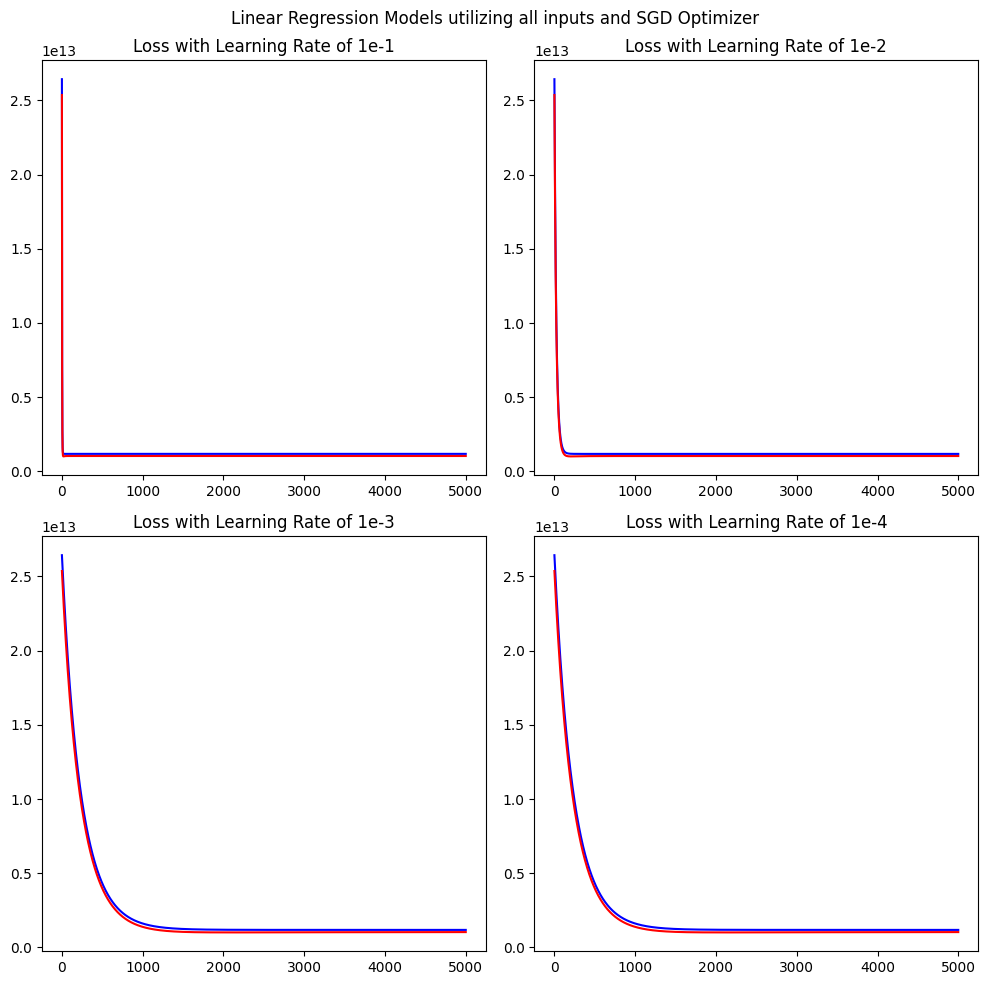

In [54]:
plt.figure(figsize=(10, 10))
plt.suptitle('Linear Regression Models utilizing all inputs and SGD Optimizer')

plt.subplot(2,2,1)
plt.plot(SGD_trainLoss1, color='blue')
plt.plot(SGD_validLoss1, color='red')
plt.title('Loss with Learning Rate of 1e-1')

plt.subplot(2,2,2)
plt.plot(SGD_trainLoss2, color='blue')
plt.plot(SGD_validLoss2, color='red')
plt.title('Loss with Learning Rate of 1e-2')

plt.subplot(2,2,3)
plt.plot(SGD_trainLoss3, color='blue')
plt.plot(SGD_validLoss3, color='red')
plt.title('Loss with Learning Rate of 1e-3')

plt.subplot(2,2,4)
plt.plot(SGD_trainLoss3, color='blue')
plt.plot(SGD_validLoss3, color='red')
plt.title('Loss with Learning Rate of 1e-4')

plt.tight_layout()
plt.show()



> **Adam Optimized Linear Model**



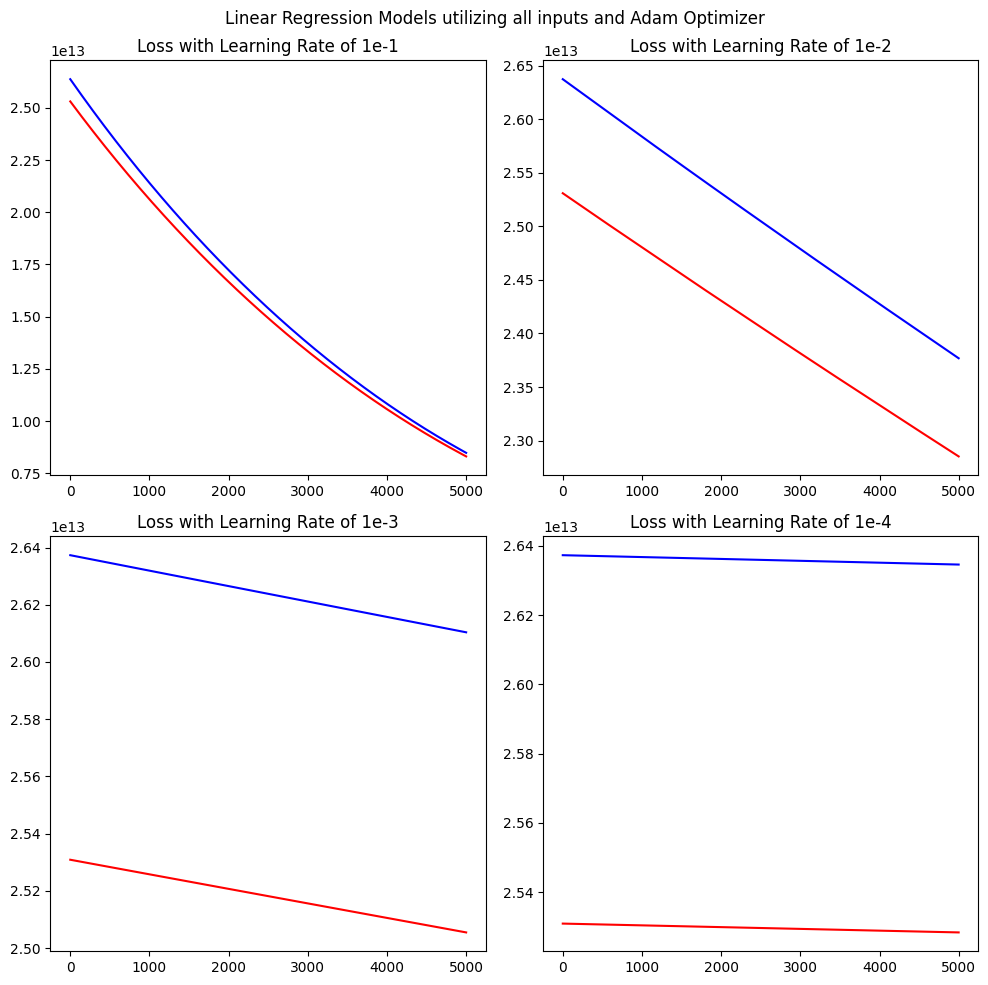

In [55]:
plt.figure(figsize=(10, 10))
plt.suptitle('Linear Regression Models utilizing all inputs and Adam Optimizer')

plt.subplot(2,2,1)
plt.plot(adam_trainLoss1, color='blue')
plt.plot(adam_validLoss1, color='red')
plt.title('Loss with Learning Rate of 1e-1')

plt.subplot(2,2,2)
plt.plot(adam_trainLoss2, color='blue')
plt.plot(adam_validLoss2, color='red')
plt.title('Loss with Learning Rate of 1e-2')

plt.subplot(2,2,3)
plt.plot(adam_trainLoss3, color='blue')
plt.plot(adam_validLoss3, color='red')
plt.title('Loss with Learning Rate of 1e-3')

plt.subplot(2,2,4)
plt.plot(adam_trainLoss4, color='blue')
plt.plot(adam_validLoss4, color='red')
plt.title('Loss with Learning Rate of 1e-4')

plt.tight_layout()
plt.show()